# Задание 9.11. Модуль 13 (HW-01)

## Подготовка данных

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

print('pd:', pd.__version__)
print('sns:', sns.__version__)
print('plt:', matplotlib.__version__)
print('px:', plotly.__version__)

# Исправление возможных ошибок отображения в ноутбуках
%matplotlib inline


pd: 2.2.3
sns: 0.13.2
plt: 3.9.2
px: 5.24.1


In [3]:
churn_data_original = pd.read_csv('data/churn.csv')
churn_df = churn_data_original.copy()
churn_df.pop('RowNumber');  # Удаляем бесполезное поле

### Структура датафрейма

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Описание полей

- CustomerId — идентификатор клиента
- Surname — фамилия клиента
- CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
- Geography — страна клиента (банк международный)
- Gender — пол клиента
- Age — возраст клиента
- Tenure — сколько лет клиент пользуется услугами банка
- Balance — баланс на счетах клиента в банке
- NumOfProducts — количество услуг банка, которые приобрёл клиент
- HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
- IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
- EstimatedSalary — предполагаемая заработная плата клиента
- Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## Задания

---
### 9.1

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

#### Построение графика

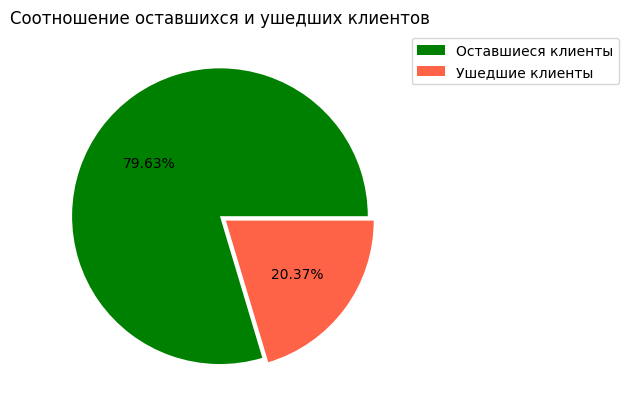

In [5]:
ax = churn_df \
    .groupby(['Exited'])['CustomerId'] \
    .count() \
    .plot(
        kind='pie', 
        colors=['green', 'tomato'], 
        title='Соотношение оставшихся и ушедших клиентов',
        autopct='%.2f%%',
        xlabel='',
        ylabel='',
        labeldistance=None,
        explode=[0, 0.05],
        legend=True, 
    );
ax.legend(['Оставшиеся клиенты', 'Ушедшие клиенты'], bbox_to_anchor=(1, 1), loc='upper left');


#### Анализ

- Оставшихся клиентов в 4 раза больше ушедших

---
### 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

#### Построение графика

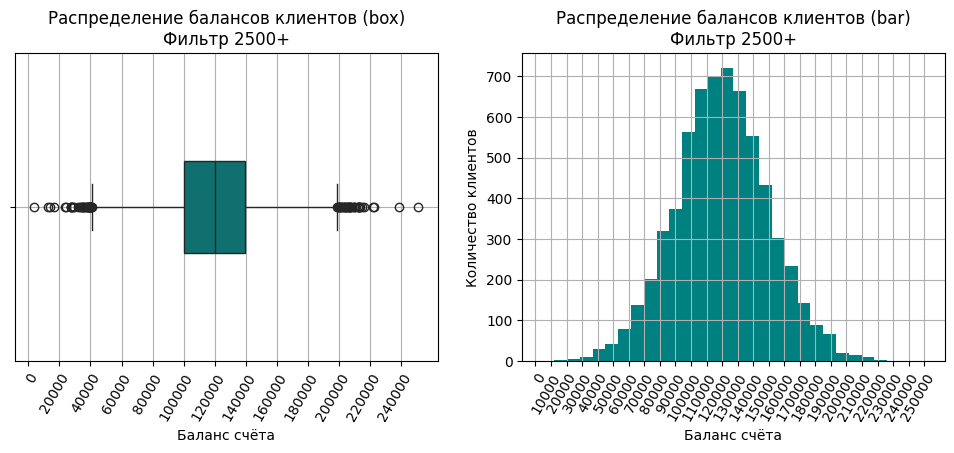

In [6]:
mask = churn_df['Balance'] > 2500

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

churn_df[mask]['Balance'].plot(
    kind='hist', 
    bins=30,
    title='Распределение балансов клиентов (bar)\nФильтр 2500+',
    xticks=range(0, int(churn_df['Balance'].max()), 10000),
    ax=ax2,
    color='teal',
    grid=True,
    xlabel='Баланс счёта',
    ylabel='Количество клиентов',
    legend=False, 
);
sns.boxplot(
    data=churn_df[mask],
    x='Balance',
    orient='h',
    width=0.3,
    ax=ax1,
    color='teal',
);

ax1.grid()
ax1.set_title('Распределение балансов клиентов (box)\nФильтр 2500+');
ax1.set_xlabel('Баланс счёта');
ax1.set_ylabel('');
ax1.set_xticks(ticks=range(0, int(churn_df['Balance'].max()), 20000))

plt.setp( ax1.xaxis.get_majorticklabels(), rotation=60, ha="right", rotation_mode="anchor", y=0) 
plt.setp( ax2.xaxis.get_majorticklabels(), rotation=60, ha="right", rotation_mode="anchor", y=0) 
plt.show()

#### Анализ

- Основное количество клиентов обладают счетами от 100 до 140 тысяч долларов.

- Пик размера счетов приходится на клиентов со счетами 120 тысяч долларов.

- Диаграмма имеет нормальное распределение, каких-либо аномальных отклонений не обнаруживается.

---
### 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

#### Построение графика

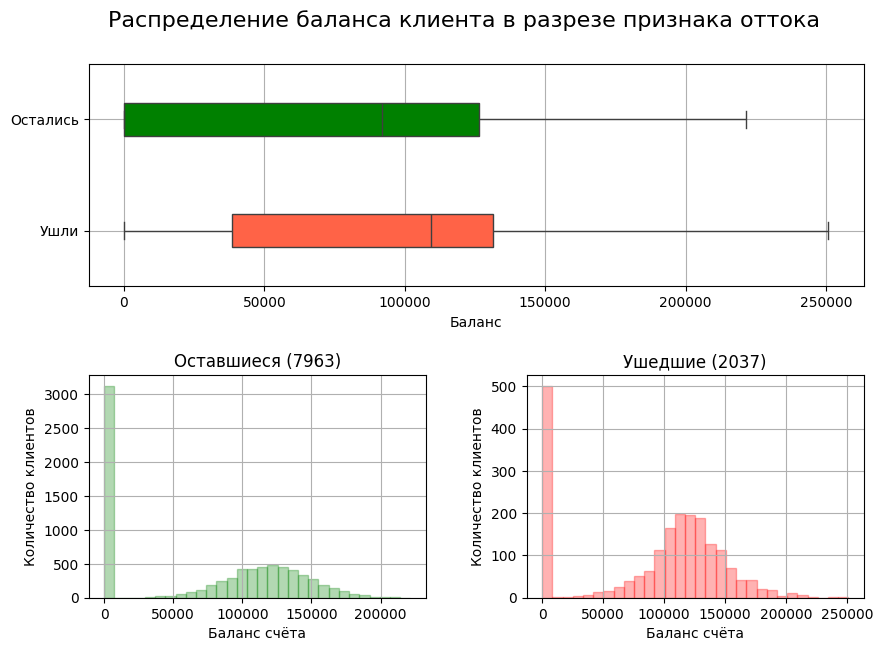

In [7]:
data_df = churn_df.loc[:, ['Balance', 'Exited']]



figure = plt.figure(figsize=(10, 6))
figure.suptitle('Распределение баланса клиента в разрезе признака оттока', fontsize=16)

gs = figure.add_gridspec(2, 2)
ax11 = figure.add_subplot(gs[0, :])
ax21 = figure.add_subplot(gs[1, 0])
ax22 = figure.add_subplot(gs[1, 1])

sns.boxplot(
    data=data_df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.3,
    ax=ax11
)
ax11.set_title('');
ax11.set_xlabel('Баланс');
ax11.set_ylabel('');
ax11.set_yticks([0, 1]);
ax11.set_yticklabels(['Остались', 'Ушли']);
ax11.patches[0].set_facecolor('green')
ax11.patches[1].set_facecolor('tomato')
ax11.grid()

data_df[data_df['Exited'] == 0]['Balance'].plot(
    kind='hist', 
    title='',
    bins=30,
    alpha=.3, 
    color='green',
    edgecolor='green',
    grid=True,
    xlabel='Баланс счёта',
    ylabel='Количество клиентов',
    legend=False, 
    ax=ax21,
);

ax21.set_title(f'Оставшиеся ({data_df[data_df["Exited"] == 0]["Exited"].count()})');

data_df[data_df['Exited'] == 1]['Balance'].plot(
    kind='hist', 
    title='',
    bins=30,
    alpha=.3, 
    edgecolor='red',
    color='red',
    grid=True,
    xlabel='Баланс счёта',
    ylabel='Количество клиентов',
    legend=False, 
    # logy=True,
    ax=ax22,
);

ax22.set_title(f'Ушедшие ({data_df[data_df["Exited"] == 1]["Exited"].count()})');

plt.subplots_adjust(top=0.89,bottom=0, wspace=0.3, hspace=0.4)
plt.show()


#### Анализ

- Ушедшие клиенты, в основном, по всем параметрам богаче (или хрянят больше денег именно в безнале), чем оставшиеся.

- Причины ухода могут быть различны, но исходя из графика возможно одна из них, плохие условия хранения денег в этом банке, например, низкие проценты по вкладам, или большие операционные комиссии. Что, на бОльших суммах заметнее влияет на прибыль клиента и влечёт за собой принятие решения о переходе в банк с более выгодными условиями.

- Наблюдается большое количество клиентов с нулевым балансом, в том числе и среди ушедших. Возможно, это связано с тем, что клиенты за некоторое время до ухода обнуляли баланс. Есть некоторая опасность того, что текущие клиенты с нулевым балансом скоро уйдут. Глубже не копнуть - мало данных.

---
### 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

#### Построение графика

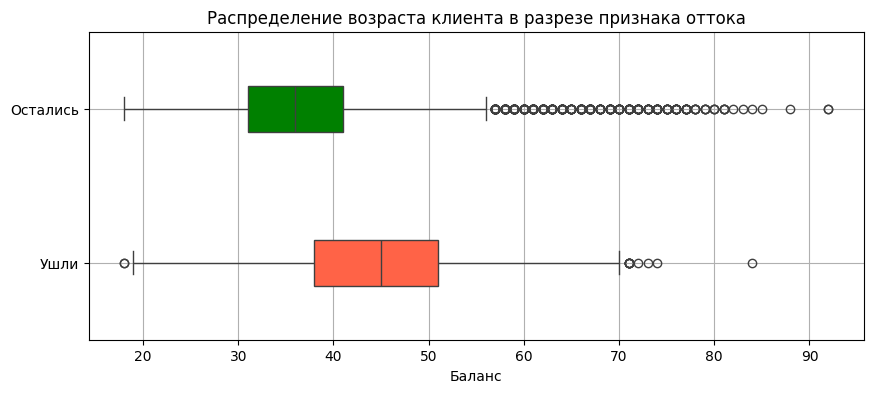

In [8]:
data_df = churn_df.loc[:, ['Age', 'Exited']]

fig = plt.figure(figsize=(10, 4))
boxplot = sns.boxplot(
    data=data_df,
    y='Exited',
    x='Age',
    orient='h',
    width=0.3,
)
boxplot.set_title('Распределение возраста клиента в разрезе признака оттока');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('');
boxplot.set_yticks([0, 1]);
boxplot.set_yticklabels(['Остались', 'Ушли']);
boxplot.patches[0].set_facecolor('green')
boxplot.patches[1].set_facecolor('tomato')
boxplot.grid()


#### Анализ

- Основное количество _**действующих клиентов**_ приходится на людей в возрасте _**32 - 42**_ лет.

- Основной _**отток клиентов**_ приходится на людей в возрасте _**38 - 51**_ года. Этот возраст сильно кореллирует с возрастом который, согласно статистических исследований, приходится на большинство топ-менеджеров и руководителей собственного бизнеса. Например в списках Fortune 500 это от 43 до 58 лет. Таким образом можно сделать предварительный вывод, что банк не очень привлекателен для бизнесменов. Особенно это становится более точным утверждением при сравнении с анализом из задания 9.3.

- Отмечаются потенциально аномальные выбросы в списке действующих клиентов в возрасте 56 лет и выше. Возможно это связано с непривлекательными условиями банка для клиентов указанного возраста. И нужно учитывать, что первая треть этого диапазона (четвертый квартиль) почти на 2/3 кореллирует с четвертим квартилем диапазона оттока клиентов, что указывает на малое влияние на этот параметр (по крайней мере на его первую треть) естественной убыли населения в этом возрасте. **_(Возможно и наоборот, но без понимания механизма получения доступа к счетам наследниками, механизма смены его владельца и знания о том, попадают ли счета умерших клиентов в категорию "Ушли" я могу сделать только такой анализ)_**

---
### 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

#### Построение графика

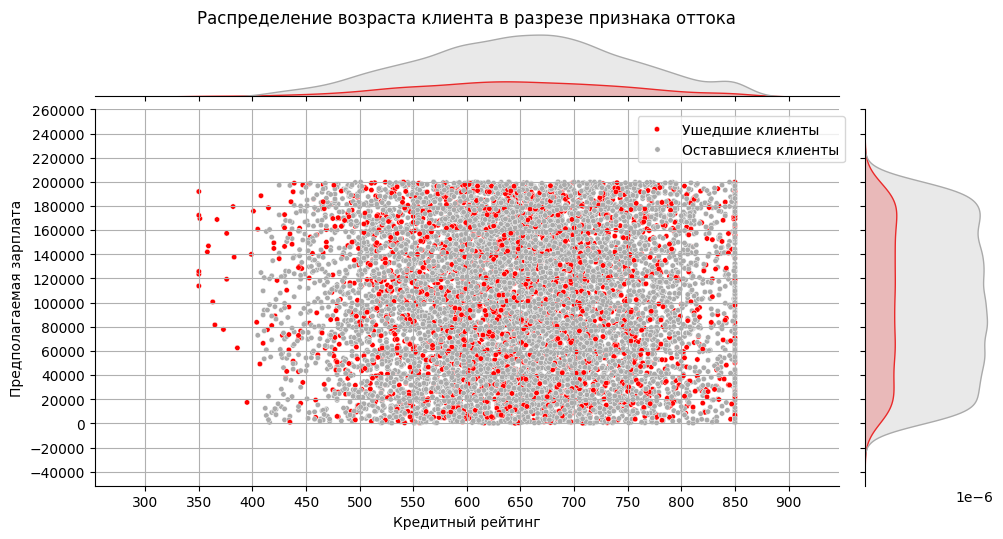

In [9]:
data_df = churn_df.loc[:, ['CreditScore', 'EstimatedSalary', 'Exited']]

jointplot = sns.jointplot(
    data=data_df, 
    x='CreditScore', 
    y='EstimatedSalary',
    height=8,
    hue='Exited',
    # hue_order=[1,0],
    kind='scatter',
    # kind='kde',
    joint_kws=dict(s=15, color='red', ),
    palette=['#aaa', 'r']
);

jointplot.figure.set_size_inches(10, 5)


a, b = ('Оставшиеся клиенты', 'Ушедшие клиенты') if jointplot.figure.axes[0].get_legend_handles_labels()[0] == '0' \
    else ('Ушедшие клиенты', 'Оставшиеся клиенты')
jointplot.figure.axes[0].legend([a, b])
jointplot.figure.axes[0].legend_.set_bbox_to_anchor((0.72, 1))
jointplot.figure.axes[0].legend_.set_loc('upper left')
jointplot.figure.axes[0].legend_.set_title('')
jointplot.figure.axes[0].set_xlabel('Кредитный рейтинг');
jointplot.figure.axes[0].set_ylabel('Предполагаемая зарплата');
jointplot.figure.axes[1].set_title('Распределение возраста клиента в разрезе признака оттока');
# jointplot.figure.axes[0].set_xscale('log')
# jointplot.figure.axes[0].set_yscale('log')

jointplot.figure.axes[0].set_yticks(ticks=range(-40000, int(churn_df['EstimatedSalary'].max() + 80000), 20000));
jointplot.figure.axes[0].set_xticks(ticks=range(300, 901, 50));

jointplot.figure.axes[0].grid(True)


#### Анализ

- Не нахожу особой взаимосвязи или аномалий. Разве что: ушли **все** клиенты с рейтингом ниже 400. Не могу определить насколько эта информация полезна.

- Плотность распределения кредитных рейтингов примерно одинаковая для всех уровней предполагаемой зарплаты

---
### 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

#### Подсказка
Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

#### Построение графика

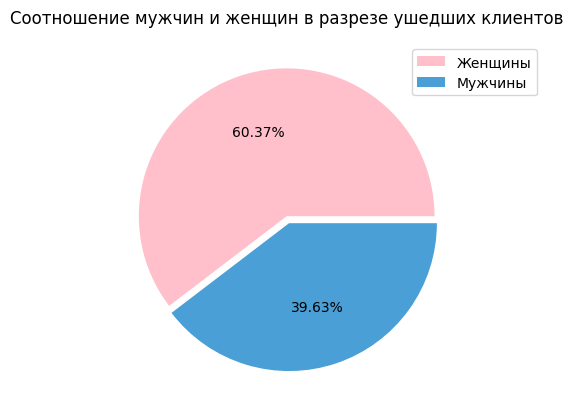

In [10]:
data_df = churn_df.groupby(['Gender'])['Exited'].mean()

ax = data_df.plot(
        kind='pie', 
        colors=['pink', '#499fd6'], 
        title='Соотношение мужчин и женщин в разрезе ушедших клиентов',
        autopct='%.2f%%',
        xlabel='',
        ylabel='',
        labeldistance=None,
        explode=[0, 0.05],
        legend=True, 
    );

a, b = ('Мужчины', 'Женщины') if ax.get_legend_handles_labels()[0] == 'Male' \
    else ('Женщины', 'Мужчины')
ax.legend([a, b])
ax.legend_.set_bbox_to_anchor((0.82, 0.97))
ax.legend_.set_loc('upper left')
ax.legend_.set_title('')

#### Анализ

- Женщины покидают банк в 1,5 раза чаще чем мужчины

---
### 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

#### Построение графика

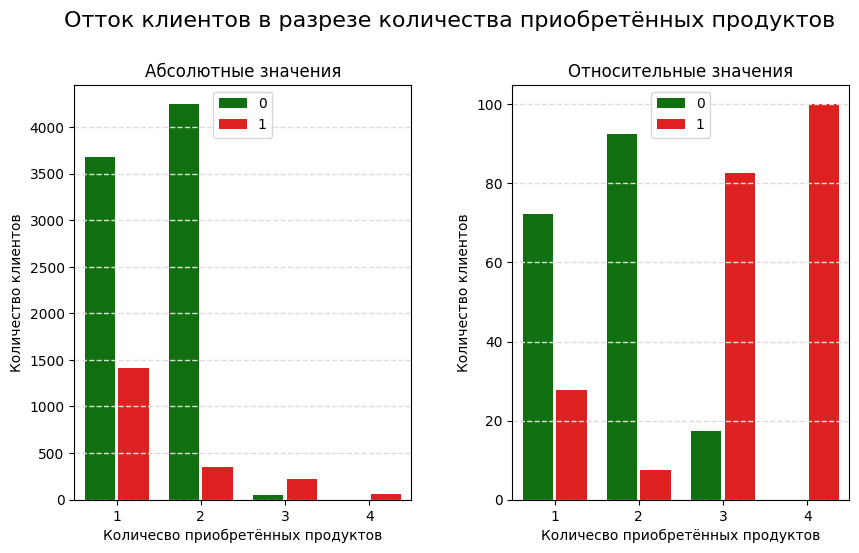

In [266]:
data_df = churn_df.loc[:, ['NumOfProducts', 'Exited']]

data_df_sum = data_df.copy()
data_df_sum['Count'] = 1
data_df_sum = data_df_sum.groupby(by=['NumOfProducts'], as_index=False)[['Count']].sum()

data_df_all = data_df.copy()
data_df_all['Count'] = 1
data_df_all = data_df_all.groupby(['NumOfProducts','Exited'], as_index=False).count()


num_of_products = data_df_all['NumOfProducts'].unique()
exited = data_df_all['Exited'].unique()
for np in num_of_products:
    for ex in exited:
        all_row_mask = (data_df_all['NumOfProducts'] == np) & (data_df_all['Exited'] == ex)
        sum_row_mask = data_df_sum['NumOfProducts'] == np
        data_df_all.loc[all_row_mask, 'Overall'] = data_df_sum.loc[sum_row_mask, 'Count'].iloc[0]

data_df_all['Percent'] = data_df_all['Count'] / data_df_all['Overall'] * 100

figure, (ax11, ax12, ) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
figure.suptitle('Отток клиентов в разрезе количества приобретённых продуктов', fontsize=16)

sns.barplot(
    data=data_df_all,
    x="NumOfProducts", 
    y="Count", 
    hue="Exited", 
    palette=['g', 'r'],
    ax=ax11,
    gap=.1,
)
sns.barplot(
    data=data_df_all,
    x="NumOfProducts", 
    y="Percent", 
    hue="Exited", 
    palette=['g', 'r'],
    ax=ax12,
    gap=.1,
)

ax11.set_title('Абсолютные значения')
ax11.grid(True, color='#ddd', linestyle='dashed', linewidth=1)
ax11.grid(False, axis='x')
ax11.set_xlabel('Количесво приобретённых продуктов');
ax11.set_ylabel('Количество клиентов');
ax11.x = 1

ax12.set_title('Относительные значения')
ax12.grid(True, color='#ddd', linestyle='dashed', linewidth=1)
ax12.grid(False, axis='x')
ax12.set_xlabel('Количесво приобретённых продуктов');
ax12.set_ylabel('Количество клиентов');
ax12.x = 1


a, b = ('Ушедшие', 'Оставшиеся') if ax11.get_legend_handles_labels()[0] == 0 \
    else ('Оставшиеся', 'Ушедшие')
# ax11.legend([a, b])
# ax11.legend_.set_bbox_to_anchor((0.5, 1.15))
ax11.legend_.set_loc('upper center')
ax11.legend_.set_title('')

a, b = ('Ушедшие', 'Оставшиеся') if ax12.get_legend_handles_labels()[0] == 0 \
    else ('Оставшиеся', 'Ушедшие')
# ax12.legend([a, b])
# ax12.legend_.set_bbox_to_anchor((0.5, 1.15))
ax12.legend_.set_loc('upper center')
ax12.legend_.set_title('')

plt.subplots_adjust(top=0.83,bottom=0, wspace=0.3, hspace=0.4)
plt.show()

#### Анализ

- В абсолютных значениях больше всего ушло клиентов купивших 1 продукт.

- Относительно общего числа клиентов ушли 80% клиентов купивших 3 продукта и **все** купившие 4 продукта.

- Абсолютное большинство оставшихся клиентов используют 1 или 2 продукта, с небольшим перевесом 2х.

---
### 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

#### Построение графика

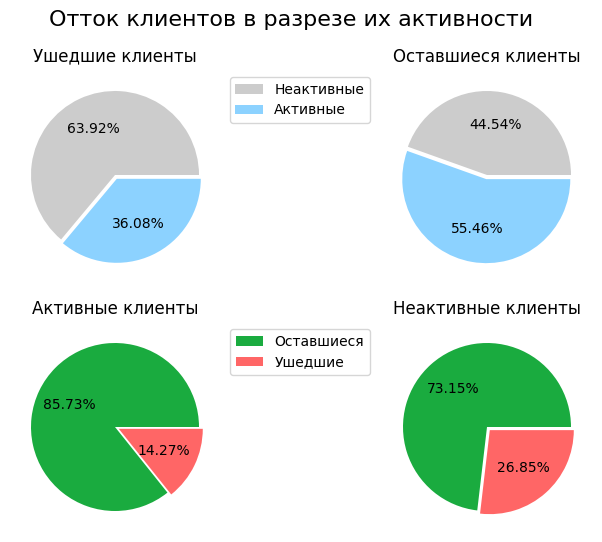

In [ ]:
mask_exited = churn_df['Exited'] == 1
mask_loyal = churn_df['Exited'] == 0
mask_active = churn_df['IsActiveMember'] == 1
mask_passive = churn_df['IsActiveMember'] == 0

data_df_exited_activity = churn_df[mask_exited].groupby(by=['IsActiveMember'])['Exited'].count()
data_df_loyal_activity = churn_df[mask_loyal].groupby(by=['IsActiveMember'])['Exited'].count()

data_df_active_loyalty = churn_df[mask_active].groupby(by=['Exited'])['IsActiveMember'].count()
data_df_passive_loyalty = churn_df[mask_passive].groupby(by=['Exited'])['IsActiveMember'].count()

fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.suptitle('Отток клиентов в разрезе их активности', fontsize=16)

data_df_exited_activity.plot(
    kind='pie', 
    colors=['#ccc', '#8cd2ff'], 
    title='Ушедшие клиенты',
    autopct='%.2f%%',
    xlabel='',
    ylabel='',
    labeldistance=None,
    explode=[0, 0.05],
    legend=True, 
    ax=ax11
);

data_df_loyal_activity.plot(
    kind='pie', 
    colors=['#ccc', '#8cd2ff'], 
    title='Оставшиеся клиенты',
    autopct='%.2f%%',
    xlabel='',
    ylabel='',
    labeldistance=None,
    explode=[0, 0.05],
    legend=False, 
    ax=ax12
);

a, b = ('Активные', 'Неактивные') if ax11.get_legend_handles_labels()[0] == '0' \
    else ('Неактивные', 'Активные')
ax11.legend([a, b])
ax11.legend_.set_bbox_to_anchor((1.38, 1.0))
ax11.legend_.set_loc('upper center')
ax11.legend_.set_title('')


data_df_active_loyalty.plot(
    kind='pie', 
    colors=['#1aab3f', '#f66'],  # green - red
    title='Активные клиенты',
    autopct='%.2f%%',
    xlabel='',
    ylabel='',
    labeldistance=None,
    explode=[0, 0.05],
    legend=True, 
    ax=ax21
);

data_df_passive_loyalty.plot(
    kind='pie', 
    colors=['#1aab3f', '#f66'], 
    title='Неактивные клиенты',
    autopct='%.2f%%',
    xlabel='',
    ylabel='',
    labeldistance=None,
    explode=[0, 0.05],
    legend=False, 
    ax=ax22
);

a, b = ('Ушедшие', 'Оставшиеся') if ax21.get_legend_handles_labels()[0] == '0' \
    else ('Оставшиеся', 'Ушедшие')
ax21.legend([a, b])
ax21.legend_.set_bbox_to_anchor((1.38, 1.0))
ax21.legend_.set_loc('upper center')
ax21.legend_.set_title('')

plt.subplots_adjust(wspace=0.5)
plt.show()

#### Анализ

- Чаще всего уходят **неактивные клиенты**. Их доля в количестве ушедших клиентов равна **64%**
- Среди **общего количества неактивных клиентов** отток составляет **27%**

К сожалению я мало что понимаю в банковском деле, по-этому не могу ничего предложить.

---
### 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

#### Построение графика

In [254]:
data_df = churn_df.groupby(['Geography'], as_index=False)['Exited'].aggregate(['sum', 'mean', 'count'])
data_df.loc[:, ['mean']] = round(data_df.loc[:, 'mean'] * 100, 2)
data_df_sum = churn_df[churn_df['Exited'] == 1].groupby(['Geography'], as_index=False)['Exited'].sum()

figure = px.choropleth(
    data_frame=data_df,
    locations="Geography",
    locationmode = "country names",
    color="mean",
    # range_color=[350, 850],  # Границы диапазона по базе 413 - 814.
    # range_color=[0, 50],  # Границы диапазона по базе ~16-33.
    title='Ушедшие клиенты (в процентах от общего количества в стране)',
    width=650,
    height=500,
    color_continuous_scale='Reds',
    scope='europe',  # В базе только данные по Франции, Германии и Испании
    hover_data=['mean', 'sum', 'count'],
    hover_name = 'Geography',
)

figure.update_layout(
    margin={"r":10,"t":80,"l":10,"b":10},
    coloraxis_colorbar=dict(
        title="",
    )
)

figure.update_geos(fitbounds="locations", visible=True)  # Зумимся до стран с данными

hover_template = '<b>%{location}</b><br><br>Ушло <b>%{customdata[1]}</b> из <b>%{customdata[2]}</b><br><br><b>%{z}%</b><extra></extra>'
figure.update_traces(hovertemplate=hover_template)

figure.show()


##### Если график не отображается тут есть <a href="./exited_by_country.png" target="_blank">png</a> или <a href="./exited_by_country.html" target="_blank">html</a>

#### Анализ

- В абсолютных значений больше всего клиентов ушло во Франции и Германии.
- В процентах самый большой отток клиентов в Германии
- Причины могут быть различны. Одна из них - плохой менеджмент клиентов на местах 

---
### 9.10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

#### Построение графика

In [ ]:
# def get_credit_score_cat(credit_score):
#     if credit_score >= 300 and credit_score < 500:
#         return "Very_Poor"
#     elif credit_score >= 500 and credit_score < 601:
#         return "Poor"
#     elif credit_score >= 601 and credit_score < 661:
#         return "Fair"
#     elif credit_score >= 661 and credit_score < 781:
#         return "Good"
#     elif credit_score >= 781 and credit_score < 851:
#         return "Excellent"
#     elif credit_score >= 851:
#         return "Top"
#     elif credit_score < 300:
#         return "Deep"

Переписал функцию, так как она не соответствовала моим представлениям о прекрасном. К тому же нужно было как-то обеспечить сортировку категорий рейтингов по возрастанию и убыванию значения рейтинга

In [275]:
credit_score_list = [
    ('Deep', [0, 300]),
    ('Very_Poor', [300, 500]),
    ('Poor', [500, 601]),
    ('Fair', [601, 661]),
    ('Good', [661, 781]),
    ('Excellent', [781, 851]),
    ('Top', [851, 1000]),
]
def get_credit_score_cat(credit_score):
    val = [item for item in credit_score_list if item[1][0] <= credit_score < item[1][1]]
    if not val:
        val = credit_score_list[0] if credit_score <= credit_score_list[0][1][0] else credit_score_list[len(credit_score_list) - 1]
    else:
        val = val[0]
    return val[0]

def credit_score_categories_list(reverse: bool = False):
    """
    Возвращает список категорий в порядке возрастания рейтинга
    или убывания при reverse = True
    """
    result = [val[1][0] for val in enumerate(credit_score_list)]
    if reverse:
        result.reverse()
    return result


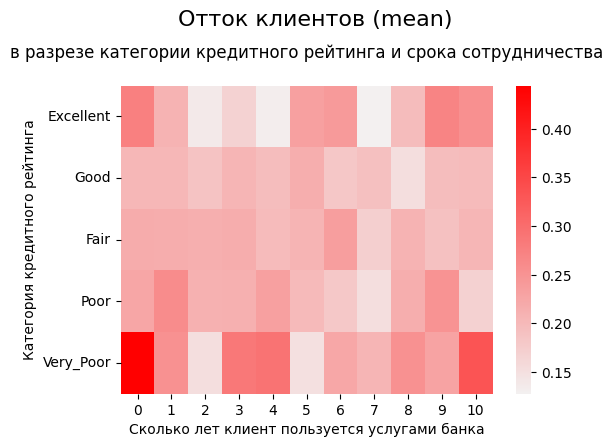

In [276]:
data_df = churn_df.loc[:, ['CreditScore', 'Tenure', 'Exited']]

data_df['CreditScoreCat'] = data_df['CreditScore'].apply(get_credit_score_cat).astype('category')

# Реиндекс нужен для улучшенния вывода, так как по-умолчанию 
# категории выводятся в алфавитном порядке, пример: Excellent, Fair, Good, Poor, Very_Poor.
data_pivot = data_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    observed=True
).reindex(credit_score_categories_list(True)).dropna()  # Заодно сносим NaN, так как credit_score_categories_list 
                                                        # не проверяет на отсутствие категорий в таблице.

figure, ax11 = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
figure.suptitle('Отток клиентов (mean)', fontsize=16, ha='center', x=0.45, y=1.07)

sns.heatmap(
    data=data_pivot, 
    cmap=sns.color_palette("light:red", as_cmap=True),
    ax=ax11,
)

ax11.set_ylabel('Категория кредитного рейтинга');
ax11.set_xlabel('Сколько лет клиент пользуется услугами банка');

ax11.set_title('в разрезе категории кредитного рейтинга и срока сотрудничества', loc='center', pad=20)

plt.setp( ax11.yaxis.get_majorticklabels(), rotation=0, ha="right", rotation_mode="anchor", y=0) 

plt.show()

#### Анализ

- Чаще всего уходят клиенты с рейтингом менее 500 и сроком сотрудничества с банком до 1 года 

## Общие выводы

- Организации стоит обратить внимание на работу с клиентами возраста от 38 лет до 51 года, обладающих балансами от 100 до 140 тысяч долларов и пользующихся 3-мя или 4-мя продуктами.

- Так же стоит обратить внимание на женскую часть клиентов. Они уходят чаще мужчин.

- И самое пристальное внимание нужно обратить на представительства в Германии. Отток клиентов - 32,5%.  
